# Set-up Code

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2020FA folder and put all the files under A1 folder, then '2020FA/A1'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'pytorch_tudui'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['.DS_Store', '.git', 'Data', 'Dataset Class.ipynb']


In [4]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

import time, os
os.environ["TZ"] = "US/Eastern"
time.tzset()

In [6]:
import torch
if torch.cuda.is_available:
  print('Good to go!')
else:
  print('Please set GPU via Edit -> Notebook Settings.')

Good to go!


In [7]:
from torch.utils.data import Dataset
from PIL import Image
import os

# Create a Dataset Class!

In [18]:
class MyData(Dataset):

  def __init__(self, root_dir, label):
    self.root_dir = root_dir
    self.label = label
    self.img_path = os.path.join(self.root_dir, self.label+'_image')
    self.all_img_path = os.listdir(self.img_path)
    self.label_path = os.path.join(self.root_dir, self.label+'_label')
    self.all_label_path = os.listdir(self.label_path)

  def __getitem__(self, idx):
    img_name = self.all_img_path[idx]
    img_item_path = os.path.join(self.img_path, img_name)
    img = Image.open(img_item_path)
    label_name = self.all_label_path[idx]
    label_item_path = os.path.join(self.label_path, label_name)
    label = open(label_item_path, "r").read()
    return img, label
  
  def __len__(self):
    return len(self.img_path)

ants


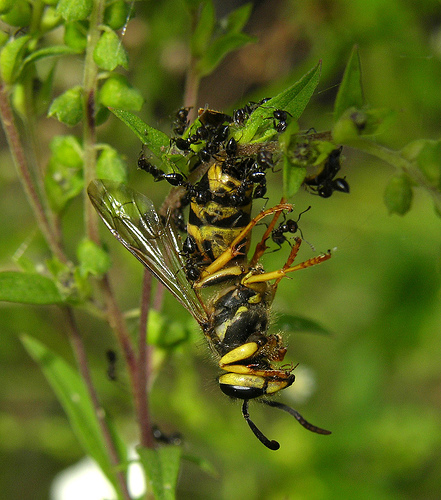

In [24]:
root_dir = '/content/drive/MyDrive/pytorch_tudui/Data/tutorial_data/train'
label = 'ants'
ants_dataset = MyData(root_dir, label)
img, label = ants_dataset[0]
print(label)
display(img)

bees


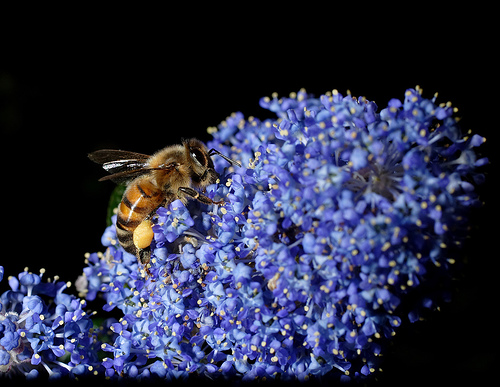

In [25]:
label = 'bees'
bees_dataset = MyData(root_dir, label)
img, label = bees_dataset[0]
print(label)
display(img)

144
bees


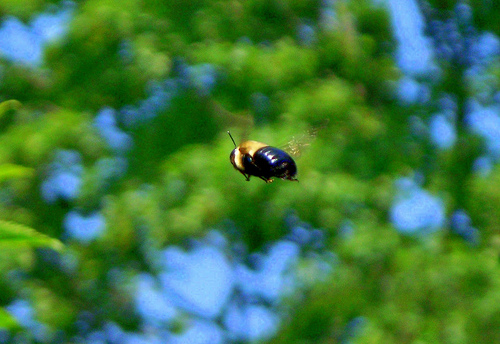

In [26]:
train_dataset = ants_dataset + bees_dataset
img, label = train_dataset[129]
print(len(train_dataset))
print(label)
display(img)